In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from scipy.interpolate import UnivariateSpline

In [2]:
df=pd.read_csv("Hrdata (2).csv")          #import data
dfn=df.to_numpy(dtype="float32")          #converting to arrays
x= dfn[:,0]                               #extracting wavelengths
y= dfn[:,1]                               #extracting N.flux
y_normalized= (y-y.min())/(y.max()-y.min())
print(y)
print(y_normalized)


[0.729812  0.7530678 0.7730934 ... 1.00229   1.0036402 1.0046293]
[0.69026285 0.7157239  0.73764837 ... 0.9885786  0.9900568  0.9911397 ]


[]

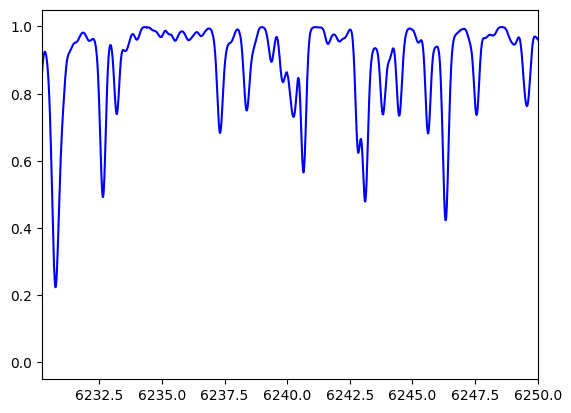

In [8]:
plt.plot(x, y_normalized, c="b")
plt.xlim(6230.2, 6250)
plt.plot()

(6230.2, 6231.5)

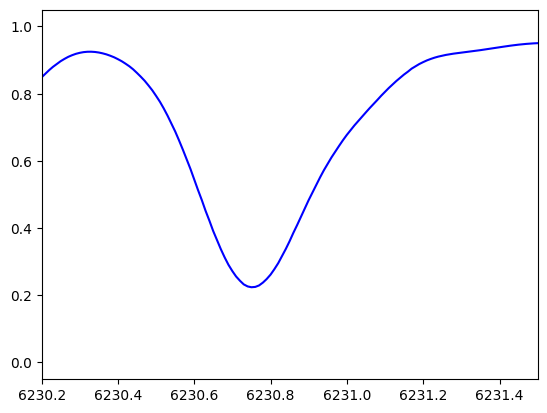

In [9]:
plt.plot(x, y_normalized, c="b")

plt.xlim(6230.2, 6231.5)

#  Gaussain fitting
## Calculating resolution, FWHM

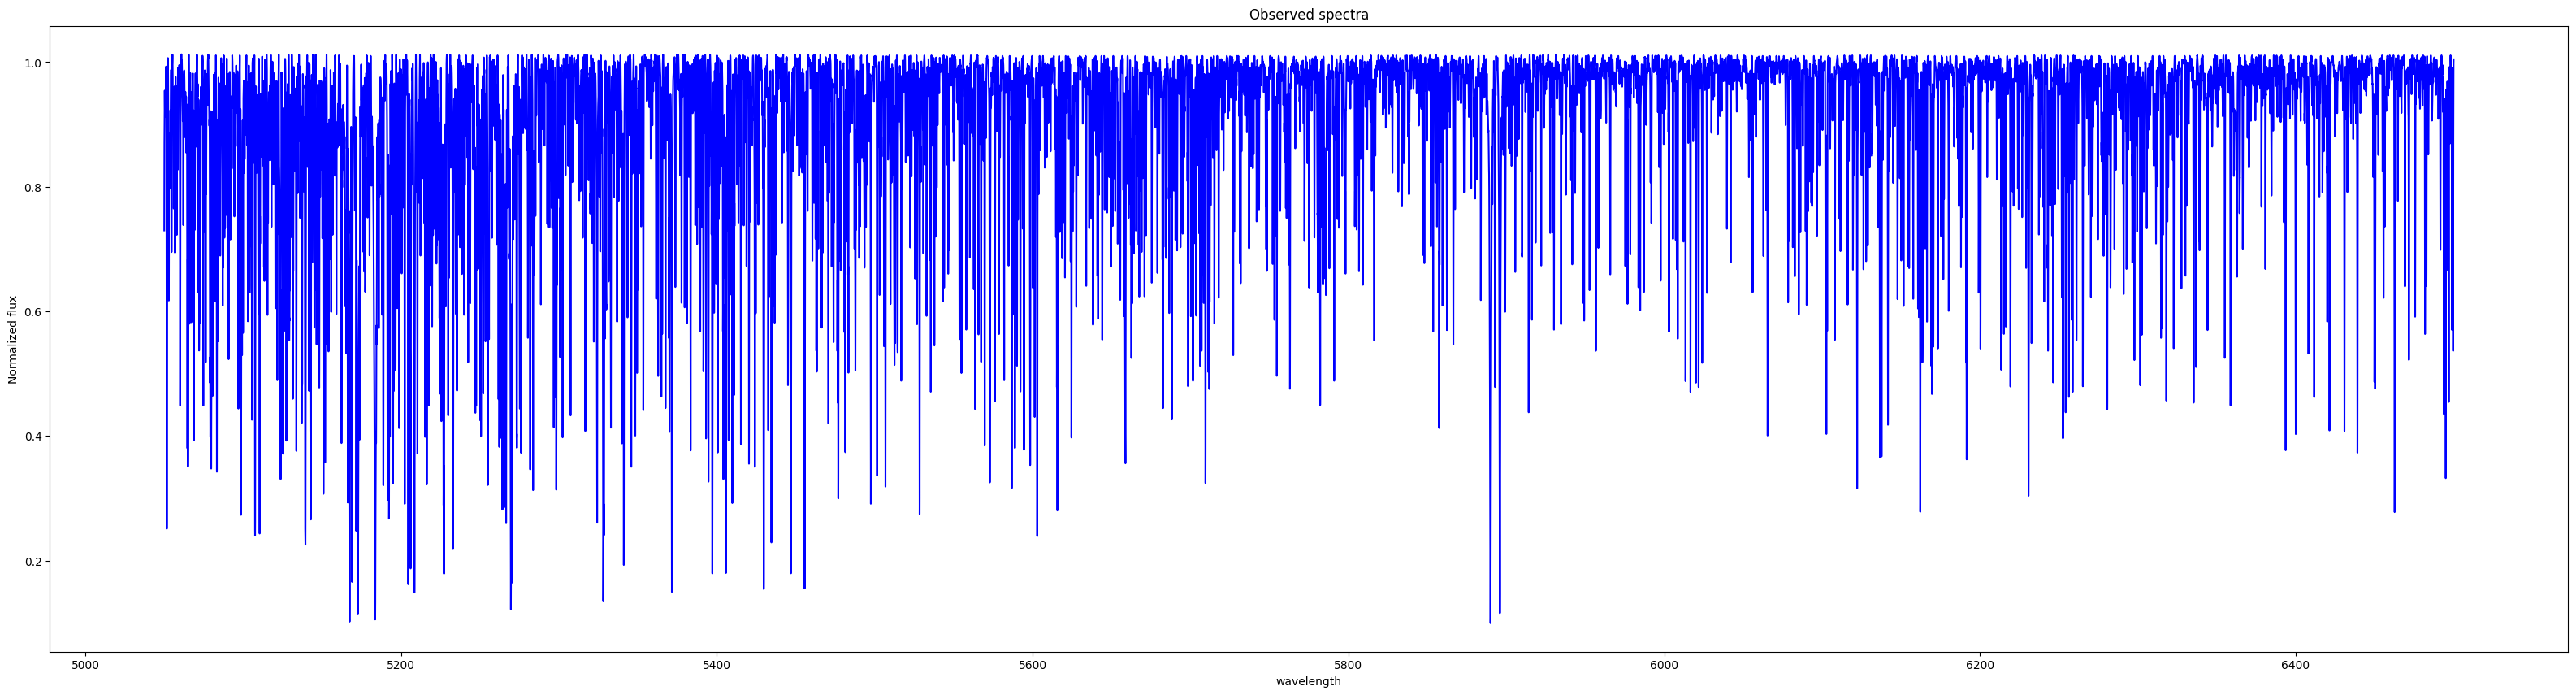

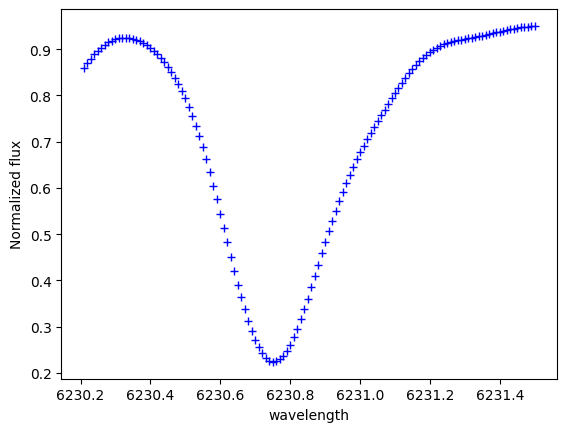

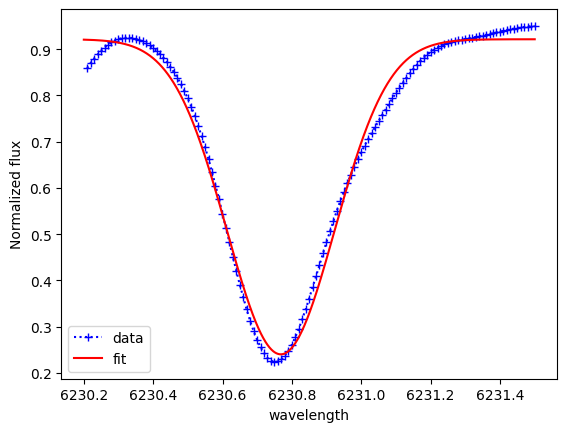

FWHM of the data= 0.31199842420846835
Resolution of origional data= 23 885.3244


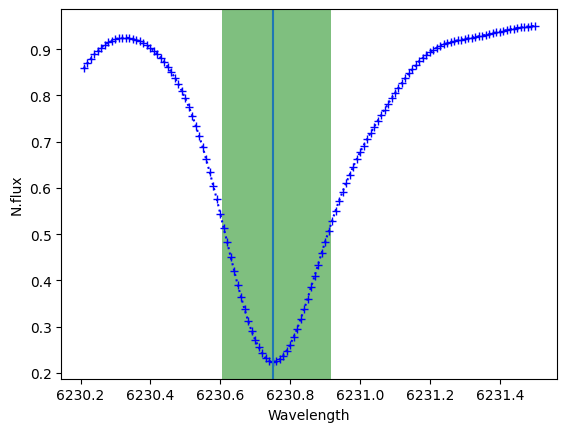

FWHM with the gaussain function= 0.3338473282483392
Resolution with the fit=22,065.7506


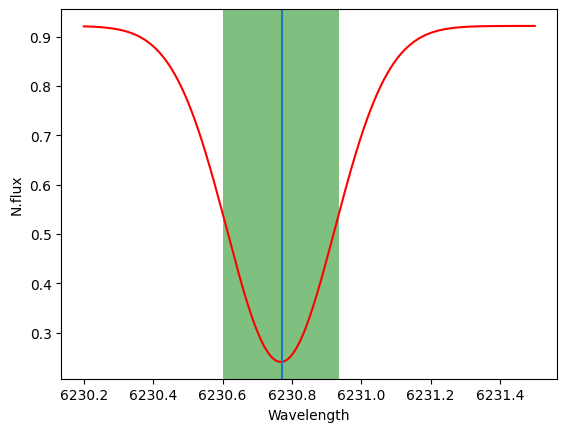

In [5]:
# choosing an absroption line between 6230.2 and 6231.4
# ------------------------------------------------------------------------------------------------------------------------------

λ = (x >= 6230.2) & (x <= 6231.5)  # define wavelength range
x1 = x[λ]  # values of wavelength
y1 = y_normalized[λ]  # values of N.flux
xx = np.linspace(6230.2, 6231.5, 2000)  # for smooth plot-more points
x2 = sum(x1 * y1) / sum(y1)  # mean
σ = np.sqrt(sum(y1 * (x1 - x2) ** 2) / sum(y1))  # spread


def g(x1, y0, a, x0, σ):
    return y0 - a * np.exp(
        -((x1 - x0) ** 2) / (2 * σ**2)
    )  # define gaussian function(inverted)


popt, pcov = curve_fit(g, x1, y1, p0=[9.41015225e-01, max(y1) - min(y1), x2, σ])


# ----------------------------------------------plotting the data-------------------------------------------------------------
plt.figure(figsize=(40, 10))
plt.plot(x, y, c="b", label="original spectra")
plt.xlabel("wavelength")
plt.ylabel("Normalized flux")
plt.title("Observed spectra")
plt.show()

plt.plot(x1, y1, "b+")
plt.xlabel("wavelength")
plt.ylabel("Normalized flux")
plt.show()


plt.plot(x1, y1, "b+:", label="data")
plt.plot(xx, g(xx, *popt), c="r", label="fit")
plt.legend()
plt.xlabel("wavelength")
plt.ylabel("Normalized flux")
plt.plot()
plt.show()
spline = UnivariateSpline(x1, 1 - y1 - np.max(y1) / 2, s=0)
r1, r2 = spline.roots()
FWHM = r2 - r1
print("FWHM of the data=", FWHM)
print("Resolution of origional data=", 23, 885.3244)
plt.plot(x1, y1, "b+:")
plt.axvspan(r1, r2, facecolor="g", alpha=0.5)
plt.axvline(x=6230.7496)
plt.xlabel("Wavelength")
plt.ylabel("N.flux")

plt.show()

spline = UnivariateSpline(xx, 1 - g(xx, *popt) - np.max(g(xx, *popt)) / 2, s=0)
r1, r2 = spline.roots()
FWHM = r2 - r1
print("FWHM with the gaussain function=", FWHM)
print("Resolution with the fit=22,065.7506")

plt.plot(xx, g(xx, *popt), c="r")
plt.axvspan(r1, r2, facecolor="g", alpha=0.5)
plt.axvline(x=6230.77)
plt.xlabel("Wavelength")
plt.ylabel("N.flux")
plt.show()

# Calculation of equivalent width

In [6]:
import numpy as np
from scipy.integrate import simps

# Define the wavelength range for the equivalent width calculation
equivalent_width_range = (r1, r2)

# Extract the relevant portion of the spectrum and the fitted Gaussian function

y1_within_range = y1[
    (x1 >= equivalent_width_range[0]) & (x1 <= equivalent_width_range[1])
]
x1_within_range = x1[
    (x1 >= equivalent_width_range[0]) & (x1 <= equivalent_width_range[1])
]
gaussian_fit_within_range = g(x1_within_range, *popt)

# Calculate the equivalent width for the fitted Gaussian function
equivalent_width_fit = simps(1 - gaussian_fit_within_range, x1_within_range)

print("Equivalent Width (Fit):", equivalent_width_fit)

Equivalent Width (Fit): 0.21009934455452445


The equivalent width of the line is = 0.2160559178749968 angstroms


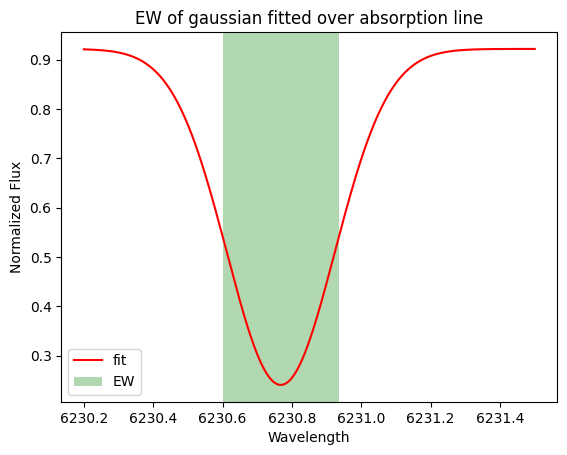

In [7]:
# calculating the equivalent width

λ1 = r1  # defining the endpoints of the wavelength bin chosen = left and right FWHM
λ2 = r2
range = (xx >= λ1) & (xx <= λ2)
x3 = xx[range]  # range of values of λ to be integrated
g1 = 1 - g(x3, *popt)  # the flux decrement-how much flux decreases from unity


#   λ2
EW = simps(g1, x3)  # using he formula for EW,  EW= ∫(1-(Fλ/Fc))dλ
#   λ1

# plotting
print("The equivalent width of the line is =", EW, "angstroms")
plt.plot(xx, g(xx, *popt), c="r", label="fit")
plt.axvspan(λ1, λ2, facecolor="g", alpha=0.3, label="EW")
plt.xlabel("Wavelength")
plt.ylabel("Normalized Flux")
plt.title("EW of gaussian fitted over absorption line")
plt.legend()
plt.show()